# PROJECT: USED CAR MARKET
**GIẢNG VIÊN HƯỚNG DẪN: THẦY TRẦN TRUNG KIÊN**  

**THÔNG TIN NHÓM 12:**
1. DIỆP ĐẠI THIỆN NHÂN - 18120491
2. PHẠM MINH SỸ - 18120540

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Thu thập dữ liệu

- Tập dữ liệu mà nhóm lựa chọn là `CAR DETAILS FROM CAR DEKHO`. Tập dữ liệu này thu thập thông tin về các loại xe qua sử dụng đã được bán. Nó bao gồm các thuộc tính name, year, selling_price, km_driven, fuel, seller_type, transmission, ower.Tập dữ liệu được thu thập từ trang `Kaggle` tại link sau [đây](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?fbclid=IwAR2RaMF8NWDYGPCl0sB9Y8HtpPx84xQDdDqlOPpypt0VzSNxRM_quWmlYGM) , dữ liệu được công khai có license tại [đây](https://opendatacommons.org/licenses/dbcl/1-0/)
- Vì đây là dữ liệu trên `Kaggle` nên chúng ta chỉ cần đăng nhập là có thể lấy được dữ liệu này về một cách dễ dàng 
- Tập dữ liệu này được người ta thu thập bằng các thông tin công khai từ trang  www.cardekho.com
- Trong đồ án này, nhóm xin được sửa dụng file `CAR DETAILS FROM CAR DEKHO.csv`

## Khám phá dữ liệu (đan xen tiền xử lý)

### Đọc dữ liệu 

In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
print(f"Kich thuoc cua du lieu: {df.shape}")
print(f"So dong cua du lieu la: {df.shape[0]}")
print(f"So cot cua du lieu la: {df.shape[1]}")

Kich thuoc cua du lieu: (4340, 8)
So dong cua du lieu la: 4340
So cot cua du lieu la: 8


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau hay không?

Mỗi dòng cung cấp thông tin về  một loại xe đã qua sử dụng đã được bán đi, có vẻ như không có một dòng nào có ý nghĩa khác thường xuất hiện ở đây

### Dữ liệu có các dòng bị thiếu không?

In [4]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Dữ liệu không có dòng nào bị thiếu

### Dữ liệu có các dòng bị lặp không?

In [5]:
print(f"So dong bi lap: {df.duplicated().sum()}")

So dong bi lap: 763


## Tiền xử lý

### Loại bỏ dòng dữ liệu bị lặp

In [6]:
df = df.drop_duplicates()
print(f"Kich thuoc cua data sau khi loai bo cac dong bi lap: {df.shape}")

Kich thuoc cua data sau khi loai bo cac dong bi lap: (3577, 8)


## Khám phá dữ liệu (tiếp tục)

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dữ liệu trên trang `Kaggle`
- name: Tên của chiếc xe
- year: Năm của chiếc xe khi được mua
- selling_price: Giá của chiếc xe khi được bán lại (Đơn vị tính theo đô la)
- km_driven: Số km chiếc xe đã đi được
- fuel: Loại nhiên liệu chiếc xe sử dụng
    + Petrol
    + Diesel
    + CNG
    + LPG
    + Electric
- seller_type: Loại người bán
    + Individual
    + Dealer
    + Trustmark Dealer
- transmission: Hộp số truyền động của động cơ
    + Manual
    + Automatic
- owner: Số đời chủ của loại xe khi được bán lại
    + First Owner
    + Second Owner
    + Third Owner
    + Fourth & Above Owner
    + Test Drive Car

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


Để biết được kiểu dữ liệu thật sự của các phần tử trong các cột `object`  này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu. Do đó tiền hành code hàm open_object_dtype trả về tập các kiểu dữ liệu có ở trong các cột

In [8]:
def open_object_dtype(s):
    dtypes = set(s.map(type))
    return dtypes

In [9]:
obj_cols = df.select_dtypes(["object"]).columns
data = obj_cols.map(lambda x: open_object_dtype(df[x]))
pd.Series(data=data, index = obj_cols)

name            {<class 'str'>}
fuel            {<class 'str'>}
seller_type     {<class 'str'>}
transmission    {<class 'str'>}
owner           {<class 'str'>}
dtype: object

Có vẻ như không có cột nào đang có kiểu dữ liệu không phù hợp.

### Với mỗi cột dữ liệu numeric, các giá trị được phân bố như thế nào?

Có tổng cột 3 cột có dữ liệu numeric, đó là `year`, `selling_price` và `km_driven`. 

Với mỗi cột numeric, ta sẽ tính tỉ lệ phần trăm giá trị bị thiếu (từ 0 đến 100), min và max

In [10]:
pd.options.display.float_format = '{:,.0f}'.format
nume_cols = ["year", "selling_price", "km_driven"]

def missing_ratio(s):
    return s.isnull().mean() * 100

numeric_col_profiles_df = df[nume_cols].agg([missing_ratio, 'min', 'max'])
numeric_col_profiles_df

,year,selling_price,km_driven
missing_ratio,0,0,0
min,"1,992","20,000",1
max,"2,020","8,900,000","806,599"


Nhìn qua thì dữ liệu có cột `km_driven` có giá trị nhỏ nhất là 1 hơi bất thường. Chúng ta sẽ thử tính toán và vẽ biểu đồ xem thử các giá trị này có thực sự bất thường hay không?

In [11]:
year_df = pd.DataFrame(df['year'].value_counts())
year_df.columns = ["Number of years"]


<BarContainer object of 27 artists>

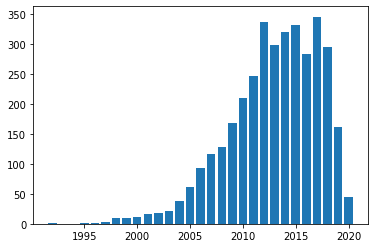

In [12]:
plt.bar(year_df.index, year_df['Number of years'])

Theo quan sát thì số lượng những chiếc xe cũ được bán rất ít và những chiếc xe có đời gần đây và không quá mới thì được ưu chuộng hơn

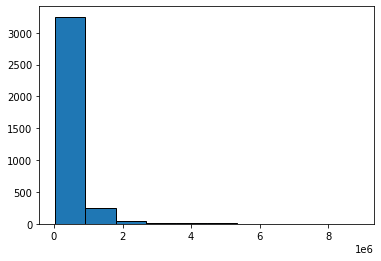

In [13]:
plt.hist(df['selling_price'], edgecolor='black');

In [14]:
len(df[df['selling_price'] > 3000000])

25

Theo quan sát, số lượng những chiếc xe đã qua sử dụng được bán lại có giá trị lớn hơn 3000000 đô la là rất ít bởi vì trên thực tế có những chiếc xe siêu đắt nên giá bán lại của chúng cũng không hề nhỏ là điều dễ hiểu

In [15]:
df.km_driven.value_counts().sort_index()

1         1
101       3
1000      7
1001      2
1010      7
         ..
347089    1
350000    2
400000    1
560000    1
806599    1
Name: km_driven, Length: 770, dtype: int64

Nhận thấy số lượng xe đã đi được 1km chỉ có 1 xe và hơi bất thường vì xe này giống như chỉ vừa mới mua và đã được bán lại cho người khác. Ta sẽ xem như đây là 1 giá trị ngoại lệ và tiến hành loại bỏ

<AxesSubplot:>

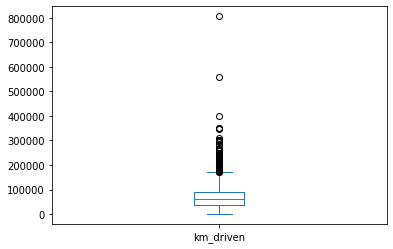

In [16]:
df.km_driven.plot.box()

In [17]:
len(df[df['km_driven'] > 350000])

3

Theo quan sát số lượng những chiếc xe được bán được có số km đi lớn hơn 350000 km cũng rất là nhỏ (3 giá trị)

## Tiền xử lý

### Loại bỏ các dòng có giá trị khoảng cách đi được ngoại lệ

In [18]:
df = df[df.km_driven > 1]

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột dữ liệu categorical, các giá trị được phân bố như thế nào?

In [19]:
cate_cols = ['fuel', 'seller_type', 'transmission', 'owner']
def num_diff_vals(series):
    return series.dropna().nunique()

def diff_vals(series):
    return series.dropna().unique()

cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

cate_col_profiles_df

,fuel,seller_type,transmission,owner
missing_ratio,0,0,0,0
num_diff_vals,5,3,2,5
diff_vals,"[Petrol, Diesel, CNG, LPG, Electric]","[Individual, Dealer, Trustmark Dealer]","[Manual, Automatic]","[First Owner, Second Owner, Fourth & Above Own..."


### Làm rõ hơn cột owner

In [20]:
df.owner.value_counts()

First Owner             2218
Second Owner             977
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

Theo mô tả thì cột owner thể hiện thông tin về số đời chủ của chiếc xe được bán. Trong các giá trị thì có giá trị `Test Drive Car` chưa thể hiện rõ thông tin này và số lượng cũng rất ít nên ta tiến hành loại bỏ

## Tiền xử lý

### Loại bỏ các dòng có giá trị cột `owner` là `Test Drive Car` 

In [21]:
df = df[df.owner != 'Test Drive Car']

## Đặt câu hỏi

Sau khi khám phá và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể trả lời được bằng dữ liệu:
- **Câu 1: Giá xe thay đổi như thế nào nếu khoảng cách đã đi được thay đổi?**
    - Trả lời được câu hỏi này sẽ giúp cho người mua biết được khoảng cách đã đi chi phối như thế nào đến giá xe cũ, từ đó lựa chọn mua cho hợp lí, có thể chấp nhận được mức khoảng cách nào để tối thiểu được giá xe cũ
- **Câu 2: Giá xe trung bình của top 10 loại xe được bán nhiều nhất là bao nhiêu?**
    - Trả lời được câu hỏi này sẽ giúp cho người mua biết được xu hướng chọn xe hiện nay là gì (càng nhiều người mua thì càng tin tưởng hơn) và giá xe trung bình của top các loại xe được bán nhiều nhất từ đó lựa chọn mua loại xe nào với mức giá hợp lý
- **Câu 3: Giá xe trung bình của top 5 các hãng xe được bán nhiều nhất theo số đời chủ là bao nhiêu?**
    - Trả lời được câu hỏi này sẽ giúp người mua biết được xu hướng thay đổi giá xe theo hãng xe và số đời chủ, từ đó người mua sẽ có định hướng nên mua hãng xe nào với số đời chủ là bao nhiêu để mua xe được giá tốt nhất


## Tiền xử lý

Trong các câu hỏi có nhắc đến hãng xe nên đầu tiên chúng ta thêm cột `brand` bằng các tách từ cột `name`, thể hiện thông tin hãng xe vào dữ liệu

In [22]:
df['brand'] = df.name.str.split(" ",expand=True)[0]
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,Maruti
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,Hyundai
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,Tata
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,Hyundai
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,Maruti


## Trả lời câu hỏi

### Câu 1: Giá xe  thay đổi như thế nào khi khoảng cách đi được thay đổi?

Để trả lời được câu hỏi này chúng ta cần thực hiện như sau:
- Tạo dataframe distance_price_df với hai cột `selling_price` và `km_driven`
- Vì khoảng cách có tới 767 giá trị riêng biệt, do đó chúng ta tiến hành chia bin cho khoảng cách đi được, với độ rộng mỗi bin là 10000 (10000 là ngưỡng mà nhóm đặt ra, xem như là ngưỡng có thể chấp nhận được khi khoảng cách thay đổi), dùng hàm cut trong pandas để phân đoạn và xếp từng giá trị `selling_price` vào cột mới `bins`
- Tính trung bình giá xe theo từng `bins`
- Tính giá trị trung bình của biên trái và biên phải của mỗi bin, nhằm đại diện cho bin đó, vì cột `bins` hiện tại đang ở dạng categorical
- Vẽ biểu đồ đường để xem sự thay đổi của giá xe khi khoảng cách thay đổi, trục hoành là giá trị trong `bins_average` đặt tên lại là `Distance`, trục tung là `Price`

- Code bước 1:

In [23]:
distance_price_df = df[['selling_price', 'km_driven']]
distance_price_df.head()

,selling_price,km_driven
0,60000,70000
1,135000,50000
2,600000,100000
3,250000,46000
4,450000,141000


- Code bước 2:

In [24]:
bins = np.arange(0, distance_price_df['km_driven'].max(), 10000)
bins

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
       240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000,
       320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000,
       400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000,
       480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000,
       560000, 570000, 580000, 590000, 600000, 610000, 620000, 630000,
       640000, 650000, 660000, 670000, 680000, 690000, 700000, 710000,
       720000, 730000, 740000, 750000, 760000, 770000, 780000, 790000,
       800000])

In [25]:
distance_price_df['bins'] = pd.cut(distance_price_df['km_driven'], bins)
distance_price_df.head()

,selling_price,km_driven,bins
0,60000,70000,"(60000, 70000]"
1,135000,50000,"(40000, 50000]"
2,600000,100000,"(90000, 100000]"
3,250000,46000,"(40000, 50000]"
4,450000,141000,"(140000, 150000]"


- Code bước 3:

In [26]:
distance_price_df = pd.DataFrame(distance_price_df.groupby(['bins'])['selling_price'].mean())
distance_price_df.head()

,selling_price
bins,
"(0, 10000]","803,670"
"(10000, 20000]","693,972"
"(20000, 30000]","607,080"
"(30000, 40000]","535,906"
"(40000, 50000]","489,647"


- Code bước 4:

In [27]:
pd.options.display.float_format = '{:,.2f}'.format
distance_price_df['bins_average'] = np.arange(5000, bins.max(), step=10000)
distance_price_df.head()

,selling_price,bins_average
bins,,
"(0, 10000]","803,670.31",5000
"(10000, 20000]","693,971.62",15000
"(20000, 30000]","607,080.47",25000
"(30000, 40000]","535,905.72",35000
"(40000, 50000]","489,646.51",45000


In [28]:
tmp = distance_price_df[['bins_average', 'selling_price']]
tmp = tmp.set_index('bins_average')
tmp.head(10)

,selling_price
bins_average,
5000,"803,670.31"
15000,"693,971.62"
25000,"607,080.47"
35000,"535,905.72"
45000,"489,646.51"
55000,"423,714.81"
65000,"407,702.90"
75000,"407,853.50"
85000,"341,048.60"


- Code bước 5:

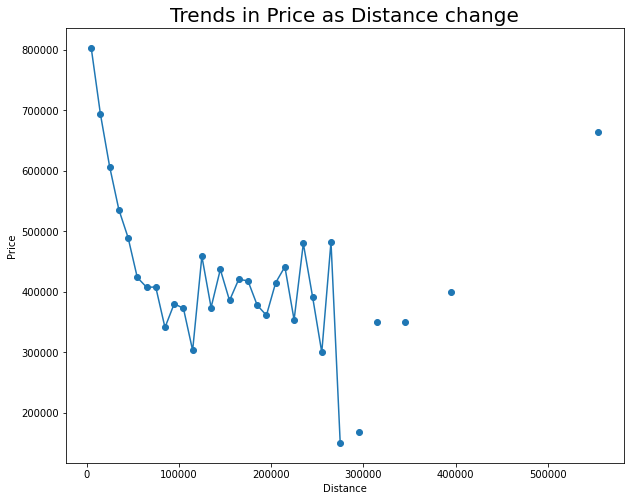

In [29]:
plt.figure(figsize=(10,8))
plt.plot(tmp, marker='o')
plt.title('Trends in Price as Distance change', size=20)
plt.xlabel('Distance')
plt.ylabel('Price');

Như vậy nhìn qua biểu đồ chúng ta có thể nhận thấy một xu hướng chung đó là khoảng cách đi được càng xa thì giá xe càng giảm, một số ngoại lệ thì có lẽ do nhiều yếu tố khác chi phối như chiếc xe đã giá đã rất cao từ ban đầu nên có bán lại thì giá vẫn còn cao hoặc có thể là những loại xe hiếm nên giá bán lại cũng rất cao. Biểu đồ sẽ tồn tại những điểm không có đoạn nối đó là do khi chia bin có một số khoảng cách đi được không có

### Câu 2: Giá xe trung bình của top 10 loại xe được bán được nhiều nhất là bao nhiêu?

Để trả lời câu hỏi này chúng ta cần thực hiện
- Tìm ra top 10 loại xe được bán nhiều nhất và lưu vào biến `top_10_selling_cars`
- Tính giá trị trung bình của các loại xe này
- Từ kết quả trên, vẽ biểu đồ dạng bar chart nằm ngang để biểu diễn. Trục hoàng là giá trị trung bình của top 10 loại xe bán được nhiều nhất và trục tung là tên của các loại xe đó

Code bước 1:

In [30]:
top_10_selling_cars = pd.DataFrame(df.name.value_counts()[:10])
top_10_selling_cars

,name
Maruti Swift Dzire VDI,54
Maruti Alto 800 LXI,48
Maruti Alto LXi,42
Maruti Alto LX,30
Hyundai EON Era Plus,28
Maruti Swift VDI BSIV,28
Maruti Wagon R VXI BS IV,26
Maruti Swift VDI,23
Maruti Wagon R LXI Minor,21
Maruti 800 AC,20


Code bước 2:

In [31]:
mean_price_cars = pd.DataFrame(df[df.name.isin(top_10_selling_cars.index)].groupby('name')['selling_price'].mean())
mean_price_top_10_selling_cars = pd.DataFrame(top_10_selling_cars.join(mean_price_cars)['selling_price'])
mean_price_top_10_selling_cars.columns = ['Price']
mean_price_top_10_selling_cars

,Price
Maruti Swift Dzire VDI,"493,314.78"
Maruti Alto 800 LXI,"239,245.75"
Maruti Alto LXi,"124,714.26"
Maruti Alto LX,"115,133.27"
Hyundai EON Era Plus,"242,464.29"
Maruti Swift VDI BSIV,"447,071.39"
Maruti Wagon R VXI BS IV,"302,499.96"
Maruti Swift VDI,"381,434.78"
Maruti Wagon R LXI Minor,"142,428.57"
Maruti 800 AC,"99,250.00"


Code bước 3:

Text(0.5, 1.0, 'Mean price of top 10 best selling used car')

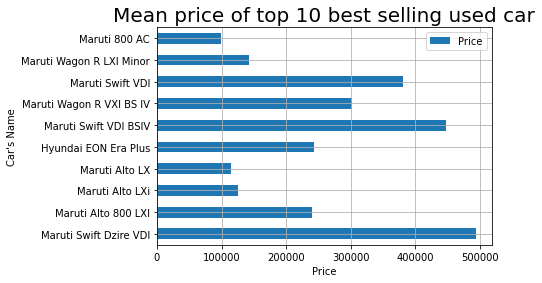

In [32]:
mean_price_top_10_selling_cars.plot(kind='barh')
plt.grid()
plt.xlabel('Price')
plt.ylabel("Car's Name")
plt.title("Mean price of top 10 best selling used car", size=20)

Nhìn chung thì top các loại xe được bán nhiều nhất đều có giá trên 100000 đô la.Chiếm phần lớn là các loại xe của hãng `Maruti` với chiếc `Maruti Swift Dizre VDI` có số lượng bán ra nhiều nhất và giá cũng cao nhất. 1 vị trí nằm trong top 10 khác thuộc về hãng `Hyundai` với giá cũng gần 250000 đô la

## Giá xe trung bình của top 5 các hãng xe được bán nhiều nhất theo số đời chủ là bao nhiêu?

Để trả lời được câu hỏi này, chúng ta cần thực hiện
- Tìm ra top 5 hãng xe có số lượng xe được bán nhiều nhất lưu vào biến
- Tính giá xe trung bình theo số đời chủ của các loại xe thuộc 5 hãng vừa tìm được
- Từ kết quả trên, vẽ biểu đồ `barh` với trục x là giá xe trung bình của các hãng xe được bán nhiều nhất, trục y là số đời chủ xe của các loại xe này

Code bước 1:

In [33]:
top_5_brand = pd.DataFrame(df.brand.value_counts()[:5])
top_5_brand

,brand
Maruti,1072
Hyundai,637
Mahindra,327
Tata,308
Honda,214


Code bước 2:

In [34]:
top_5_brand_by_owner = df[df.brand.isin(top_5_brand.index)].groupby(['owner','brand'])['selling_price'].mean()
top_5_brand_by_owner = top_5_brand_by_owner.unstack().iloc[[0,2,3,1],:]
top_5_brand_by_owner

brand,Honda,Hyundai,Mahindra,Maruti,Tata
owner,,,,,
First Owner,"615,791.10","485,797.03","689,182.72","405,010.71","354,853.90"
Second Owner,"334,555.47","322,219.46","467,419.31","230,018.12","191,168.37"
Third Owner,"210,300.00","190,961.46","340,966.53","210,047.58","129,865.90"
Fourth & Above Owner,"310,000.00","152,749.92","298,571.29","145,176.47","123,333.33"


Code bước 3:

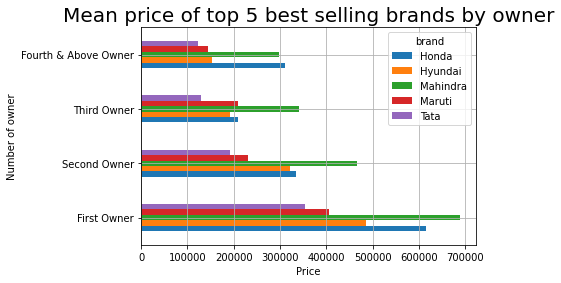

In [35]:
top_5_brand_by_owner.plot(kind='barh')
plt.xlabel('Price')
plt.ylabel('Number of owner')
plt.grid()
plt.title('Mean price of top 5 best selling brands by owner', fontsize=20);

Nhận thấy giá xe của hãng `Marutin` là hãng có số lượng xe bán được nhiều nhất luôn có giá trị trung bình cao nhất trong các hãng xe từ đời chủ thứ 3 trở xuống và xếp sau là hãng `Honda`. Sang đến các đời xe qua bốn đời chủ hoặc nhiều hơn thì giá xe của hãng `Honda` có nhiều hơn 1 chút so với hãng `Marutin` và vươn lên vị trí thứ nhất

## Nhìn lại quá trình làm đồ án

### Thành viên: Phạm Minh Sỹ

Khó khăn:
- Khó khăn trong quá trình giải quyết sư đụng độ khi gồm các nhánh lại với nhau
- Khó khăn ở việc chọn dữ liệu là làm sao phải đảm bảo yếu tố thời gian làm lẫn độ khó của dữ liệu
- Khó khăn trong việc đặt câu hỏi sao cho đảm báo yếu tố hữu ích lẫn độ khó, trong quá trình trả lời câu hỏi số 1 gặp khó khăn trong việc thực hiện ý tưởng bằng code 

Điều hữu ích học được:
- Phối hợp làm việc nhóm để đạt kết quả cuối cùng
- Học được nhiều cách xử lí dữ liệu trong quá trình thực hiện trả lời câu hỏi và các sử dụng các công cụ, thư viện hỗ trợ
- Nắm vững hơn về quy trình khoa học dữ liệu


### Thành viên: Diệp Đại Thiện Nhân

Khó khăn:
- Gặp khó khăn vì chưa thành thạo git
- Gặp khó khăn vì vướng nhiều deadline của môn học khác
- Gặp khó khăn khi đặt câu hỏi

Điều hữu ích học được:
- Các công cụ hỗ trợ cho KHDL
- Hiểu rõ hơn về quy trình KHDL
- Biết thêm về Python

### Cả nhóm

Nếu có thêm thời gian nhóm sẽ:
- Thử sức với những dữ liệu phức tạp hơn 
- Có thể nghiên cứu sâu hơn về các cột thuộc tính khác để đặt đa dạng câu hỏi hơn
- Tìm hiểu thêm về  thông tin các loại xe, hãng xe để hiểu chính xác hơn nữa về dữ liệu

## Tài liệu tham khảo

1. Slide bài giảng
2. Homework
3. https://stackoverflow.com/questions/45273731/binning-column-with-python-pandas/45273750
4. https://pandas.pydata.org/docs/
5. https://matplotlib.org/